# Part 2

## Modeling using machine learning 

In [1]:
! pip install seaborn

In [2]:
import requests
import json
import pandas as pd
import numpy as np
import geopandas as gpd
import os
import fiona
# import distancerasters as dr
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

/usr/local/lib/python3.8/dist-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


## Preparing training data

In [57]:
lc = gpd.read_file('./Data/train.shp')
lc.head(5)

,cat,class,geometry
0,1,slum,"POLYGON ((-0.19924 5.58684, -0.19475 5.58440, ..."
1,1,slum,"POLYGON ((-0.19068 5.59266, -0.19291 5.59091, ..."
2,1,slum,"POLYGON ((-0.20432 5.58025, -0.20781 5.58216, ..."
3,1,slum,"POLYGON ((-0.21129 5.59688, -0.20952 5.59532, ..."
4,1,slum,"POLYGON ((-0.23741 5.55977, -0.23355 5.55797, ..."


In [58]:
len(lc)

81

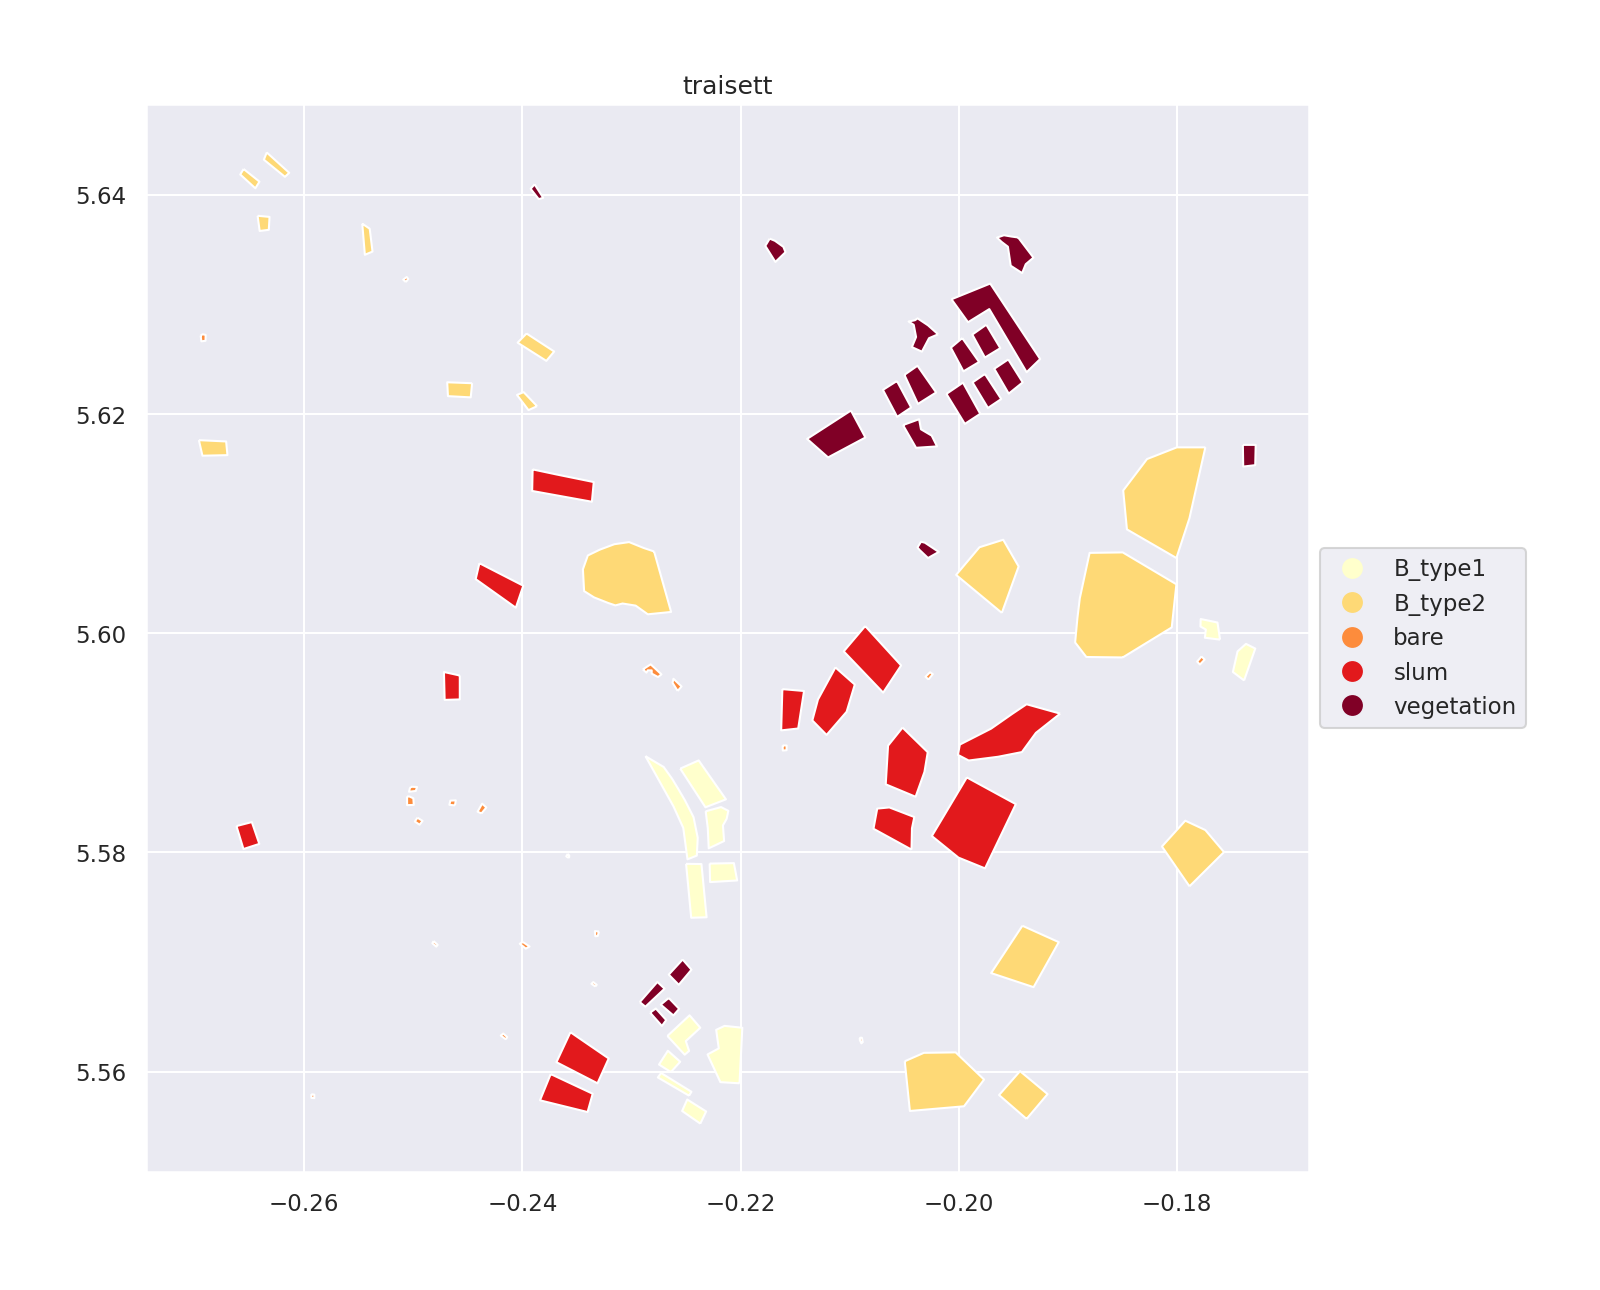

In [59]:
# Plot trainset 

fig, axes = plt.subplots(figsize=(10, 10), sharex=True)  
axes.set_title('trainset') 
lc.plot(ax=axes, column= 'class',  \
            cmap='YlOrRd', legend=True,
            legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)},
         )
ctx.add_basemap(ax=axes, crs=lc.crs)
plt.show()

In [60]:
lc.groupby(['class'],as_index=False).agg('count')

,class,cat,geometry
0,B_type1,12,12
1,B_type2,16,16
2,bare,20,20
3,slum,13,13
4,vegetation,20,20


In [61]:
from glob import glob

fp = sorted(glob('./Data/img/*.tiff'))
print(fp)


['./Data/img/B02.tiff', './Data/img/B03.tiff', './Data/img/B04.tiff', './Data/img/B08.tiff', './Data/img/NDVI.tiff', './Data/img/highway.tiff', './Data/img/industry.tiff', './Data/img/market.tiff']


In [62]:
import geowombat as gw
import os

outfile = './out/stack_acc1.tif'

with gw.config.update(ref_image=fp[0]):
    with gw.open(fp,stack_dim= 'band') as src:
        src.gw.to_raster(outfile, overwrite = True)

100%|██████████| 29/29 [00:05<00:00,  5.32it/s]


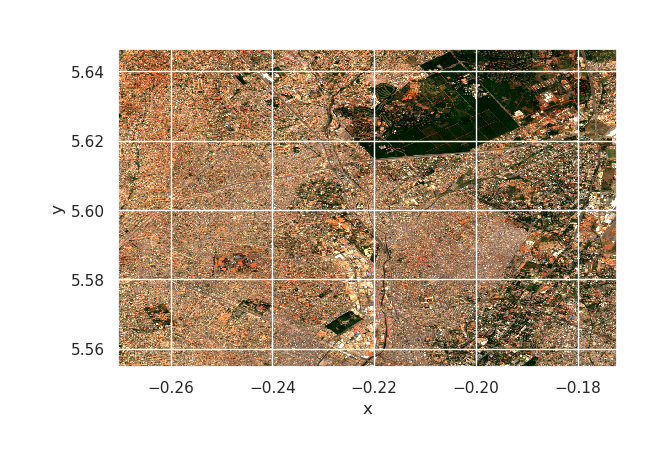

In [63]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(dpi=100)
with gw.open('./out/stack_acc1.tif') as src:
    src.sel(band=[3,2,1]).plot.imshow(robust = True,ax=ax)
plt.tight_layout(pad = 1)

In [64]:
# Extract band values to shapefile WHAT DOES THIS DO!
with gw.open(outfile) as src: 
    df = src.gw.extract(lc,  
                   band_names=src.band.values.tolist(),all_touched = True)

In [65]:
df.head()

,id,point,geometry,cat,class,1,2,3,4,5,6,7,8,9,10
0,0,0,POINT (-0.26722 5.64639),1,slum,0.0787,0.1162,0.1378,0.2999,0.31,0.54,0.18,3835.519734,4001.760041,4409.655774
1,0,1,POINT (-0.26713 5.64639),1,slum,0.0568,0.0934,0.0921,0.3204,0.06,0.33,0.04,3826.840766,3992.749516,4406.977058
2,0,2,POINT (-0.26704 5.64639),1,slum,0.0496,0.0845,0.0710,0.3247,0.00,0.27,0.00,3818.167950,3983.743415,4404.319149
3,0,3,POINT (-0.26731 5.64630),1,slum,0.0656,0.0920,0.1450,0.2261,0.50,0.70,0.28,3839.361382,4006.581237,4402.745628
4,0,4,POINT (-0.26722 5.64630),1,slum,0.0747,0.1153,0.1489,0.2705,0.44,0.64,0.25,3830.665321,3997.556859,4400.040246


# Only the 4 Bands + NVDI

In [66]:
fp2 = ['./Data/img/B02.tiff', './Data/img/B03.tiff', './Data/img/B04.tiff', './Data/img/B08.tiff', './Data/img/NDVI.tiff']
outfile2 = './out/stack_acc2.tif'

with gw.config.update(ref_image=fp[0]):
    with gw.open(fp2,stack_dim= 'band') as src:
        src.gw.to_raster(outfile2, overwrite = True)

100%|██████████| 29/29 [00:01<00:00, 17.77it/s]


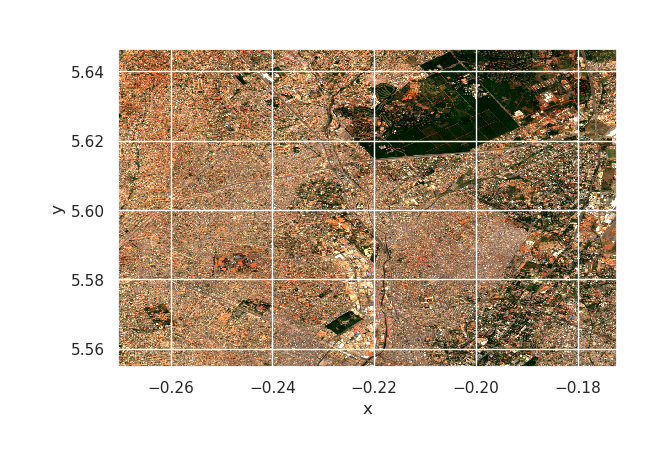

In [67]:
fig, ax = plt.subplots(dpi=100)
with gw.open('./out/stack_acc2.tif') as src:
    src.sel(band=[3,2,1]).plot.imshow(robust = True,ax=ax)
plt.tight_layout(pad = 1)

In [68]:
# Extract band values to shapefile WHAT DOES THIS DO!
with gw.open(outfile2) as src: 
    df2 = src.gw.extract(lc,  
                   band_names=src.band.values.tolist(),all_touched = True)

In [69]:
df2.head()

,id,point,geometry,cat,class,1,2,3,4,5,6,7
0,0,0,POINT (-0.26722 5.64639),1,slum,0.0787,0.1162,0.1378,0.2999,0.31,0.54,0.18
1,0,1,POINT (-0.26713 5.64639),1,slum,0.0568,0.0934,0.0921,0.3204,0.06,0.33,0.04
2,0,2,POINT (-0.26704 5.64639),1,slum,0.0496,0.0845,0.0710,0.3247,0.00,0.27,0.00
3,0,3,POINT (-0.26731 5.64630),1,slum,0.0656,0.0920,0.1450,0.2261,0.50,0.70,0.28
4,0,4,POINT (-0.26722 5.64630),1,slum,0.0747,0.1153,0.1489,0.2705,0.44,0.64,0.25


# Training Test Split for Sklearn

In [70]:
df.head()

,id,point,geometry,cat,class,1,2,3,4,5,6,7,8,9,10
0,0,0,POINT (-0.26722 5.64639),1,slum,0.0787,0.1162,0.1378,0.2999,0.31,0.54,0.18,3835.519734,4001.760041,4409.655774
1,0,1,POINT (-0.26713 5.64639),1,slum,0.0568,0.0934,0.0921,0.3204,0.06,0.33,0.04,3826.840766,3992.749516,4406.977058
2,0,2,POINT (-0.26704 5.64639),1,slum,0.0496,0.0845,0.0710,0.3247,0.00,0.27,0.00,3818.167950,3983.743415,4404.319149
3,0,3,POINT (-0.26731 5.64630),1,slum,0.0656,0.0920,0.1450,0.2261,0.50,0.70,0.28,3839.361382,4006.581237,4402.745628
4,0,4,POINT (-0.26722 5.64630),1,slum,0.0747,0.1153,0.1489,0.2705,0.44,0.64,0.25,3830.665321,3997.556859,4400.040246


In [71]:
coord_list = [(x,y) for x,y in zip(df['geometry'].x , df['geometry'].y)]

In [72]:
d = pd.DataFrame(coord_list, columns = ['x','y'])

In [73]:
d.head()

,x,y
0,-0.267222,5.646394
1,-0.267132,5.646394
2,-0.267042,5.646394
3,-0.267312,5.646305
4,-0.267222,5.646305


In [74]:
df.drop(['geometry'], axis = 1, inplace = True)

In [75]:
df.drop(['id'],axis =1,inplace=True)

In [76]:
df.drop(['point'],axis =1,inplace=True)

In [77]:
df = df.join(d)

In [78]:
df = pd.DataFrame(df)

In [79]:
df['class'].unique()

array(['slum', 'vegetation', 'B_type1', 'B_type2', 'bare'], dtype=object)

In [80]:
df.drop(['class'],axis =1,inplace=True)

In [81]:
df.head()

,cat,1,2,3,4,5,6,7,8,9,10,x,y
0,1,0.0787,0.1162,0.1378,0.2999,0.31,0.54,0.18,3835.519734,4001.760041,4409.655774,-0.267222,5.646394
1,1,0.0568,0.0934,0.0921,0.3204,0.06,0.33,0.04,3826.840766,3992.749516,4406.977058,-0.267132,5.646394
2,1,0.0496,0.0845,0.0710,0.3247,0.00,0.27,0.00,3818.167950,3983.743415,4404.319149,-0.267042,5.646394
3,1,0.0656,0.0920,0.1450,0.2261,0.50,0.70,0.28,3839.361382,4006.581237,4402.745628,-0.267312,5.646305
4,1,0.0747,0.1153,0.1489,0.2705,0.44,0.64,0.25,3830.665321,3997.556859,4400.040246,-0.267222,5.646305


In [87]:
X = df.drop('cat', axis =1)
y = df['cat']

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.25)

In [89]:
poverty_amcra_train = X_train.join(y_train)
poverty_amcra_test = X_test.join(y_test)


In [90]:
poverty_amcra_test.to_csv('test_set_amcra.csv')

In [91]:
poverty_amcra_train.to_csv('training_set_amcra.csv')

 # Modeling using GeomWombat

In [22]:
from sklearn_xarray.preprocessing import Featurizer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from geowombat.ml import fit, fit_predict
from sklearn.decomposition import PCA 
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.ensemble import GradientBoostingClassifier

# Use a data pipeline
# pipe = Pipeline([
#             ('SimpleImputer', SimpleImputer(missing_values=np.nan, strategy="mean")),

#             ('Featurizer', Featurizer()),
#             ('scaler', StandardScaler()),
#             ('Kmean',KMeans(n_clusters=5, random_state=0))
#             ('rf', RandomForestClassifier(n_estimators=1000, max_depth=500, max_features='auto', min_samples_split=3))])

### END SOLUTION
# pipe = Pipeline([
#             ('SimpleImputer', SimpleImputer(missing_values=np.nan, strategy="mean")),

#             ('Featurizer', Featurizer()),
#             ('scaler', StandardScaler()),
#             ('Kmean',KMeans(n_clusters=5, random_state=0))])

In [34]:

pipe = Pipeline([
            ('SimpleImputer', SimpleImputer(missing_values=np.nan, strategy="mean")),
            ('Featurizer', Featurizer()),
            ('scaler', StandardScaler()),
        ('rf', RandomForestClassifier())])


In [ ]:
# Why choose df instead of lc 
# with gw.open(fp,stack_dim= 'band') as src:
#     y = fit_predict(src, df, pipe, col='cat')
#     y.sel(band='targ').gw.imshow()

In [24]:
lc.drop(['id'],axis=1,inplace= True)

In [26]:
lc.head()

,cat,class,geometry
0,1,slum,"POLYGON ((-0.19924 5.58684, -0.19475 5.58440, ..."
1,1,slum,"POLYGON ((-0.19068 5.59266, -0.19291 5.59091, ..."
2,1,slum,"POLYGON ((-0.20432 5.58025, -0.20781 5.58216, ..."
3,1,slum,"POLYGON ((-0.21129 5.59688, -0.20952 5.59532, ..."
4,1,slum,"POLYGON ((-0.23741 5.55977, -0.23355 5.55797, ..."


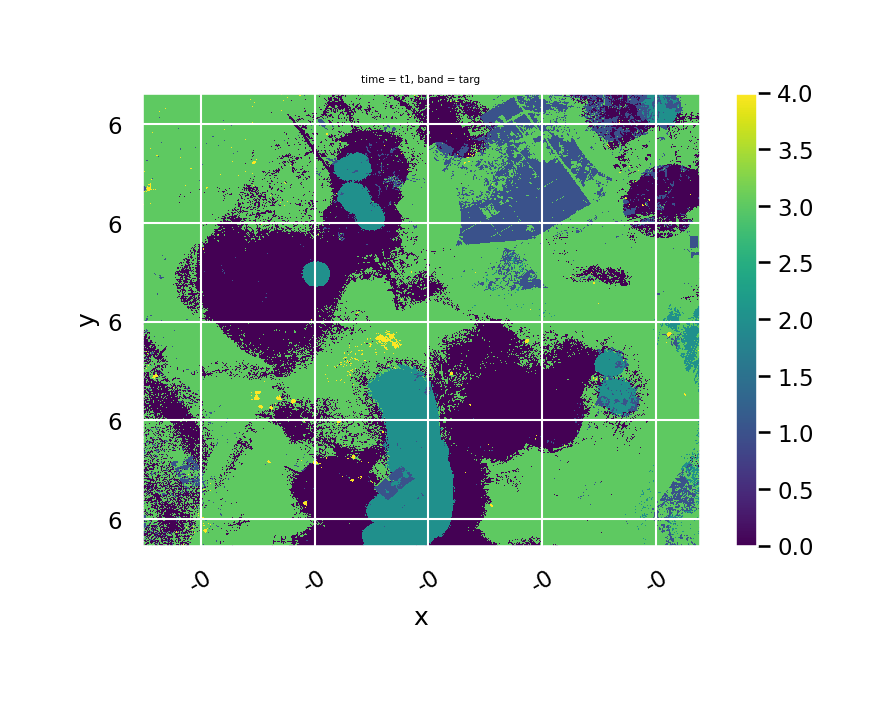

In [27]:
with gw.config.update():
    with gw.open('./out/stack_acc1.tif') as src:
        y = fit_predict(src, lc, pipe, col='cat')
        y.sel(band='targ').gw.imshow()


In [ ]:
y.shape

In [ ]:
y

# Modeling 4 Bands + NDVI

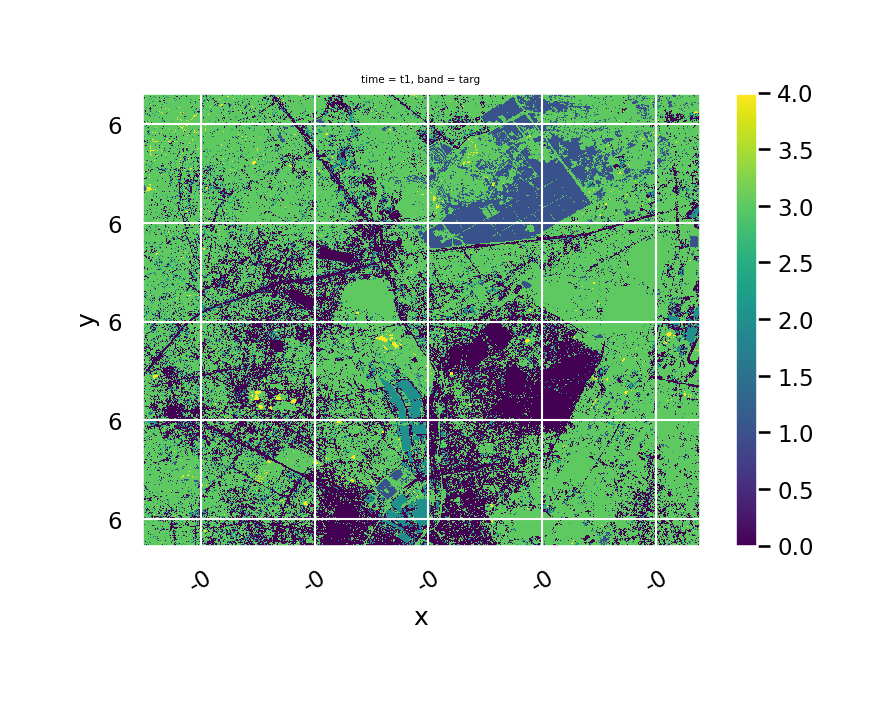

In [35]:
with gw.config.update():
    with gw.open('./out/stack_acc2.tif') as src:
        y = fit_predict(src, lc, pipe, col='cat')
        y.sel(band='targ').gw.imshow()